In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import seaborn as sns

# homework 2
write a function that takes a probability distribution sample (an unsorted numpy array of numbers that were sampled from a probability distribution) and calculate the high probability density intervals (5%-100% percentile of the probability density). Report all continuous regions as separate intervals. Please test it with the bimodal distribution below and see whether you get two HPD regions instead of just one.
The output should be in the form of a list of intervals (list of two values that brace the interval). For example: [[-4.0,0.0],[2.0,6.0]].
The first step is to estimate the probability density which you can get by binning the data into a histogram (here the challenge is to pick an appropriate binning density).  Then you have to sort the data according to probability density and then picking the HPD data.  After that you need to estimate the continuous intervals of data.

Good luck

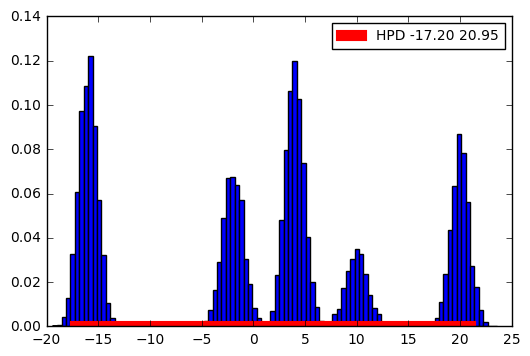

In [2]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
gauss_c = stats.norm.rvs(loc=-16, scale=0.9, size=3000)
gauss_d = stats.norm.rvs(loc=20, scale=0.9, size=2000)
gauss_e = stats.norm.rvs(loc=10, scale=1, size=1000)
# mix norm is the input of your function
mix_norm = np.concatenate((gauss_a, gauss_b, gauss_c, gauss_d, gauss_e))

HPD = np.percentile(mix_norm,[2.5,97.5])
hist = plt.hist(mix_norm, normed=True, bins=100)
plt.plot(HPD,[0,0],label='HPD {:.2f} {:.2f}'.format(*HPD),
        linewidth=8, color='red')
plt.legend(fontsize=10)

In [3]:
#*************************************************************
# This function calculates and plots the high probability    *
# density for 5%-100% percentile of the probability density. *
# It demonstrates that no matter what value you set for bins *
# (nbin in the func.), you will get the most precise 95% HPD *
# of the given sample. Enjoy!     Xuanwen Hua                *
#*************************************************************

def multi_hpd(sample,nbin):                         # function takes in the data of the sample and the setting for bins for histagram
    hist = plt.hist(sample, normed=True, bins=nbin) # generate the histagram for the sample
                                                    # return prob. density(pd) and interval size for each bar
    pd,indx = np.array(sorted(hist[0])),np.argsort(hist[0])                # sort pd in positive order and get index for sorted pd
    intv = np.array([hist[1][:-1],hist[1][1:],np.zeros(len(hist[1])-1)]).T # get interval sequence
    mini=0.0                                                               # total prob. density for data taking up 0-5% of the sample
    i=0                                                                    # record the index in which total prob. density is above 5% 
    intv[indx[i]][2]=-1                                                    # set recog. num. for intervals contributing to 5%-100%
    while mini<=(sum(hist[0])*0.05):
        mini=mini+pd[i]
        i=i+1
        intv[indx[i]][2]=-1
    
    # ****************************************************************************************
    # remaining part of data filling in the 5%-100% of the data besides the intervals selected above
    resid = int(np.round(mini*(hist[1][1]-hist[1][0])*len(sample))-np.round(len(sample)*0.05))    
    slct = intv[indx[i]]                      # remaining interval
    temp = np.array(sorted(sample))           # sort the sample in positive order
    subtemp = temp[int(np.round(sum(hist[0][0:indx[i]])*(hist[1][1]-hist[1][0])*len(sample))):
                  int(np.round(sum(hist[0][0:indx[i]+1])*(hist[1][1]-hist[1][0])*len(sample)))-1]   # remaining sample
    
    #subtemp = temp[int(np.round(sum(pd[0:i-1])*(hist[1][1]-hist[1][0])*len(sample)))-1:
    #              int(np.round(sum(pd[0:i])*(hist[1][1]-hist[1][0])*len(sample)))-1]
    #print(slct)
    #print(subtemp)
    #print(resid)
    
    # ============== select the data needing to be included as an extra interval =============
    if indx[i]==0:
        if intv[indx[i]+1][2]<0:
            extr = np.array([subtemp[int(np.round((len(subtemp)-resid+1)/2))],
                             subtemp[int(np.round((len(subtemp)+resid-1)/2))],0])
        else:
            extr = np.array([subtemp[len(subtemp)-resid],subtemp[len(subtemp)-1],0])
    elif indx[i]+1==len(intv):
        if intv[indx[i]-1][2]<0:
            extr = np.array([subtemp[int(np.round((len(subtemp)-resid+1)/2))],
                             subtemp[int(np.round((len(subtemp)+resid-1)/2))],0])
        else:
            extr = np.array([subtemp[0],subtemp[resid-1],0])
    else:
        if intv[indx[i]-1][2]<0:
            if intv[indx[i]+1][2]<0:
                extr = np.array([subtemp[int(np.round((len(subtemp)-resid+1)/2))],
                             subtemp[int(np.round((len(subtemp)+resid-1)/2))],0])
            else:
                extr = np.array([subtemp[len(subtemp)-resid],subtemp[len(subtemp)-1],0])
        else:
            if intv[indx[i]+1][2]<0:
                extr = np.array([subtemp[0],subtemp[resid-1],0])
            else:
                extr = np.array([subtemp[0],subtemp[int(np.round(resid/2-1))],0])
                intv[indx[i]+1][0] = subtemp[int(np.round(len(subtemp)-resid/2+1))]
        
    #print(extr)
    
    # ********************************************************************************
    # connect the continuous intervals that counts for 5% - 100% of the sample
    intv_f = intv
    intv_f[indx[i]] = extr
    #print(intv_f)
    hpd = []
    k = 0
    while k<len(intv_f):
        cord = []
        #print(k)
        if intv_f[k][2]<0:
            k+=1
        else:
            cord = [intv_f[k][0],intv_f[k][1]]
            #print('k_=',k)
            while (intv_f[k][2]>=0):
                cord[1]=intv_f[k][1]
                if k+1<len(intv_f):
                    k+=1
                else:
                    k+=1
                    break
            hpd.append(cord)
            #print(cord)
    hpd = np.round(np.array(hpd),2)
    
    # ********************************************************************************
    # generate the plot for high prob. density
    for j in range(len(intv)):
        if intv[j][2]>=0:
            plt.plot([intv[j][0],intv[j][1]],[0,0],linewidth=8, color='red')
    plt.plot([extr[0],extr[1]],[0,0],label=' '+str(hpd)[1:-1],linewidth=8, color='red')
    plt.legend(fontsize=10)
    
    #return hpd

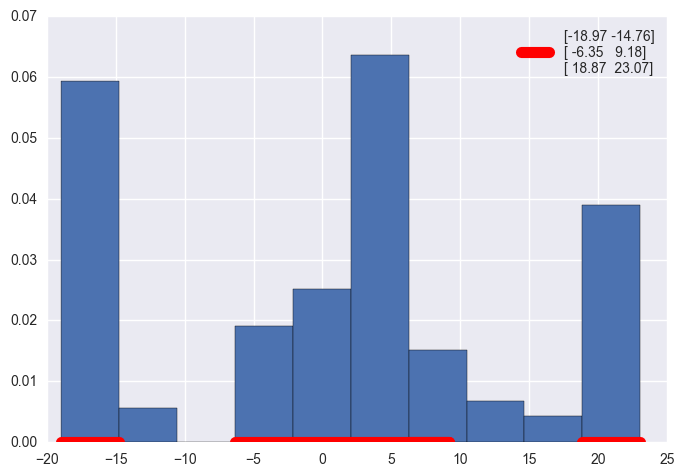

In [13]:
multi_hpd(mix_norm,10)

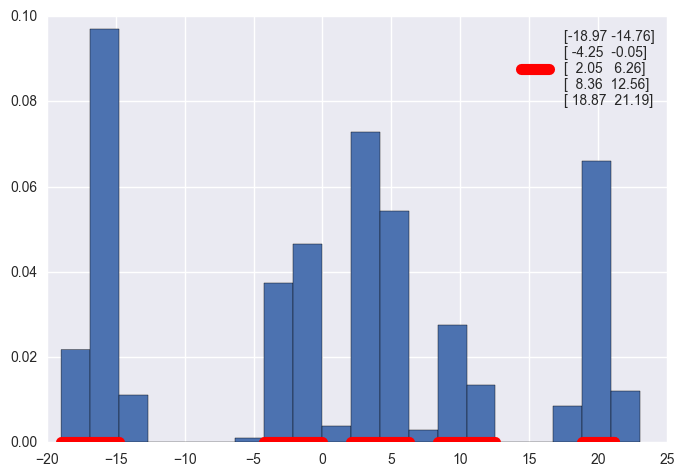

In [14]:
multi_hpd(mix_norm,20)

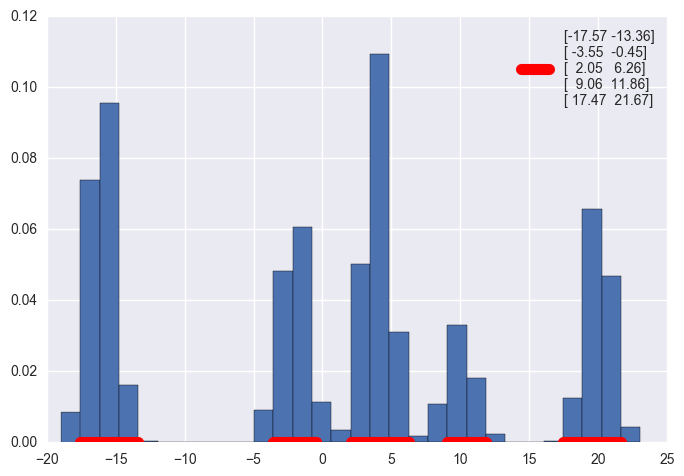

In [16]:
multi_hpd(mix_norm,30)

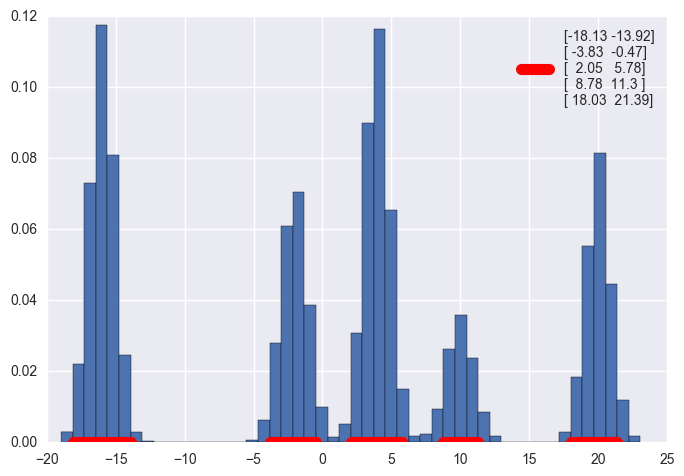

In [17]:
multi_hpd(mix_norm,50)

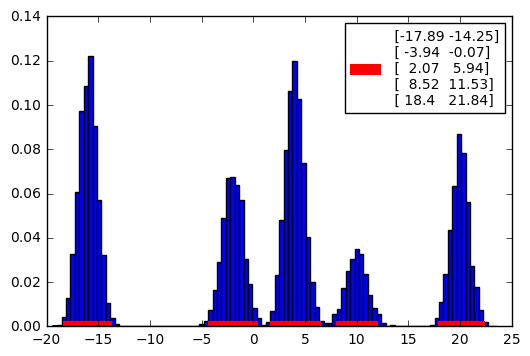

In [4]:
multi_hpd(mix_norm,100)